In [1]:
import torch
import numpy as np
from models import *
import os 

In [2]:
states_dim = 10
actions_dim = 10
MAX_TORQUE = 2.0
small_model = True
device = 'cpu'
file_location = 'results/'

In [3]:
P_hat = DirectEnvModel(states_dim, actions_dim, MAX_TORQUE, small=small_model)#, action_multiplier=0.1)
P_hat.double()
P_hat.load_state_dict(torch.load(os.path.join(file_location,'model_mle_checkpoint_actorcritic_lin-dyn-v0_horizon1_traj201_smallModel_1.pth'), map_location=device))




In [4]:
weights = P_hat.fc1.weight.data.numpy()
biases = P_hat.fc1.bias.data.numpy()

In [5]:
weights.shape

(10, 20)

In [6]:
biases.shape

(10,)

In [7]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def display_weights(file_name):
    P_hat.load_state_dict(torch.load(os.path.join(file_location,file_name), map_location=device))
    weights = P_hat.fc1.weight.data.numpy()
    print(weights[:2,:2])
    print(weights[:2,10:12])
    biases = P_hat.fc1.bias.data.numpy()
    maxVal = weights.max()
    minVal = np.abs(weights.min())
    maxVal = np.maximum(maxVal,minVal)
    weights = weights / maxVal
    weights = weights / 2.
    weights = weights + 0.5
    plt.imshow(weights, cmap="gray")
    plt.show()

[[ 0.30770386  0.13599598]
 [-0.13522233  0.30587859]]
[[ 0.0335617  -0.00174411]
 [ 0.00125616  0.03346254]]


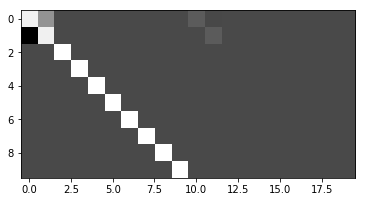

In [23]:
display_weights('model_mle_checkpoint_actorcritic_lin-dyn-v0_horizon1_traj201_smallModel_1.pth')

In [10]:
biases

array([-5.26170196e-05, -1.53752271e-05, -4.78623417e-04, -4.82919699e-04,
       -4.27596879e-04, -4.67500355e-04, -4.57764085e-04, -4.72443765e-04,
       -4.83604006e-04, -4.33741968e-04])

In [11]:
weights[:3,:3]

array([[ 3.07703864e-01,  1.35995981e-01,  1.08137166e-04],
       [-1.35222335e-01,  3.05878590e-01,  5.84128878e-06],
       [ 1.05971527e-03, -3.76342874e-04,  3.34494977e-01]])

[[-0.00387795 -0.01594487]
 [-0.00238006 -0.00516345]]
[[ 0.00132322  0.00068781]
 [-0.00206679 -0.00061519]]


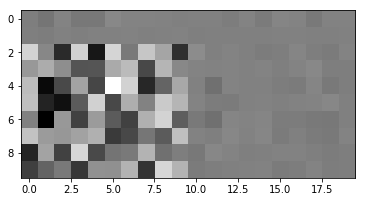

In [34]:
display_weights('act_model_paml_state10_salient2_checkpoint_train_True_lin-dyn-v0_horizon1_traj201_smallModel_1.pth')

Wasn't training, weights look random ...

[[1044.17570715 -822.79511557]
 [-155.20379949  760.92679758]]
[[ 576.9751733    67.87160464]
 [-405.52804029   79.97901619]]


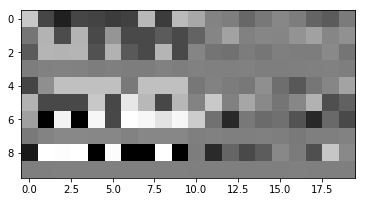

In [32]:
display_weights('model_mle_checkpoint_reinforce_lin_dyn_horizon50_traj51_smallModel_1.pth')

Probably stopped training too early for this one ...

[[-0.0166819   0.20315394]
 [-0.03169831 -0.10066503]]
[[ 0.10860278 -0.05724789]
 [ 0.03399184  0.03849743]]


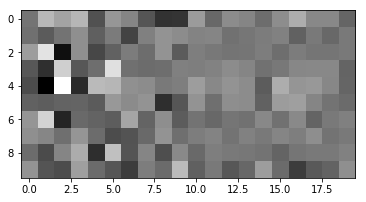

In [31]:
display_weights('model_paml_checkpoint_train_True_lin_dyn_horizon50_traj51_smallModel_1.pth')

[[ 0.30310381  0.13485328]
 [-0.13477149  0.30362083]]
[[ 3.45996250e-02 -4.89363494e-04]
 [ 9.62992819e-05  3.39257682e-02]]


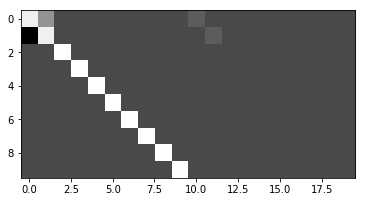

In [30]:
display_weights('model_mle_checkpoint_reinforce_lin_dyn_horizon20_traj21_smallModel_1.pth')

[[0.09303363 0.01623503]
 [0.07580302 0.01064247]]
[[ 0.02412099  0.05464225]
 [ 0.05756873 -0.02648561]]


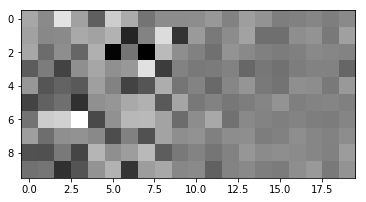

In [29]:
display_weights('model_paml_checkpoint_train_True_lin_dyn_horizon20_traj21_smallModel_1.pth')